In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly.express as px

import os # used for navigating to image path
import imageio # used for writing images

from PIL import Image
from PIL import ImageFile

import datetime

##not sure why I need this but I do
ImageFile.LOAD_TRUNCATED_IMAGES = True

pd.set_option('max_colwidth', 300)

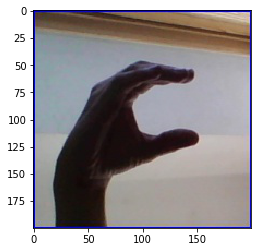

In [2]:
## Load the image
data = plt.imread('/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images/C/C9.jpg')

# Display the image
plt.imshow(data)
plt.show()

In [3]:
def img_to_np_array(path):
    image = Image.open(path)
    image = image.convert('L')
    image = np.array(image)
    return image

In [4]:
file_paths = []
image_ids = []
labels = []

for directory in os.listdir('/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images'):
    if directory != '.DS_Store':
        for file in os.listdir(os.path.join('/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images', directory)):
            file_paths.append(os.path.join('/Users/ilya/Desktop/asl/asl_images/asl_alphabet_train/images', directory, file))
            image_ids.append(file)
            labels.append(directory)

df = pd.DataFrame()

df['file_path'] = file_paths
df['image_id'] = image_ids
df['label'] = labels

df2 = df.sample(frac = 1)
df3 = df2.iloc[0:20000]

In [11]:
train_df = df3.iloc[0:round(len(df3)*0.8)]
test_df = df3.iloc[round(len(df3)*0.8):]

In [12]:
train_data = []

time1 = datetime.datetime.now()

for file_path, label in zip(train_df['file_path'], train_df['label']):
    img_np_array = img_to_np_array(file_path)
    train_data.append([img_np_array, label])

train_images = np.array([i[0] for i in train_data])
train_labels = np.array([i[1] for i in train_data])

train_images = train_images.reshape(-1, 200, 200, 1)

train_labels_df = pd.get_dummies(train_labels)
train_labels = pd.get_dummies(train_labels).to_numpy()
    
time2 = datetime.datetime.now()
elapsedTime = time2 - time1
run_time = elapsedTime.total_seconds()

print('Run time: {} seconds'.format(run_time))


Run time: 47.509058 seconds


In [14]:
test_data = []

time1 = datetime.datetime.now()

for file_path, label in zip(test_df['file_path'], test_df['label']):
    img_np_array = img_to_np_array(file_path)
    test_data.append([img_np_array, label])

test_images = np.array([i[0] for i in test_data])
test_labels = np.array([i[1] for i in test_data])

test_images = test_images.reshape(-1, 200, 200, 1)

test_labels_df = pd.get_dummies(test_labels)
test_labels = pd.get_dummies(test_labels).to_numpy()
    
time2 = datetime.datetime.now()
elapsedTime = time2 - time1
run_time = elapsedTime.total_seconds()

print('Run time: {} seconds'.format(run_time))

Run time: 9.996621 seconds


In [15]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(16000, 200, 200, 1)
(16000, 29)
(4000, 200, 200, 1)
(4000, 29)


In [16]:
directory = '/Users/ilya/Desktop/asl/raw_data'

np.save(os.path.join(directory,'train_images.npy'), train_images)
print("Train images saved!")

np.save(os.path.join(directory,'train_labels.npy'), train_labels)
print("Train labels saved!")

np.save(os.path.join(directory,'test_images.npy'), test_images)
print("Test images saved!")

np.save(os.path.join(directory,'test_labels.npy'), test_labels)
print("Test labels saved!")

test_df.to_csv(os.path.join(directory,'test_df.csv'))
print("Test Dataframe saved!")

test_labels_df.to_csv(os.path.join(directory,'test_label_column_names.csv'))
print("Test label names saved!")

Train images saved!
Train labels saved!
Test images saved!
Test labels saved!
Test Dataframe saved!
Test label names saved!
